In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

# Cargamos los datos
bananaData = np.load('banana.npy')
appleData = np.load('apple.npy')
pearData = np.load('pear.npy')
pineappleData = np.load('pineapple.npy')
watermelonData = np.load('watermelon.npy') 

print(bananaData.shape, appleData.shape, pearData.shape, pineappleData.shape, watermelonData.shape)

(307936, 784) (144722, 784) (116904, 784) (125071, 784) (132939, 784)


In [10]:
bananaData = np.array(random.sample(list(bananaData),5000))
appleData = np.array(random.sample(list(appleData),5000))
pearData = np.array(random.sample(list(pearData),5000))
pineappleData = np.array(random.sample(list(pineappleData),5000))
watermelonData = np.array(random.sample(list(watermelonData),5000))

print(bananaData.shape, appleData.shape, pearData.shape, pineappleData.shape, watermelonData.shape)

(5000, 784) (5000, 784) (5000, 784) (5000, 784) (5000, 784)


In [11]:
# 0 -> banana
# 1 -> apple
# 2 -> pear
# 3 -> pineapple
# 4 -> watermelon

X = np.concatenate((bananaData,appleData,pearData,pineappleData,watermelonData),axis=0)
X = X.reshape(-1,28,28)
X = X/255.
y = [0]*bananaData.shape[0] + [1]*appleData.shape[0] + [2]*pearData.shape[0] + [3]*pineappleData.shape[0] + [4]*watermelonData.shape[0]

print(X.shape,len(y))

(25000, 28, 28) 25000


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), test_size=0.20, random_state=42, stratify=y)

In [13]:
# Ajustamos las dimensiones de las imágenes
if X_train.ndim == 3:
    X_train = X_train[...,None]
    X_test = X_test[..., None]
    print(X_train.shape, X_test.shape)

(20000, 28, 28, 1) (5000, 28, 28, 1)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

bs = 16
lr = 0.0005
size = (28, 28)

#Espacio de busqueda
#Cantidad Filtros: 32, 64, 128, 256
#Tamaño del Filtro: 3, 5, 7
#Activaciones: 'relu', 'sigmoid', 'tanh'
#Unidades Dense: 128, 256, 100..
#lr: 0.001, 0.0001, 0.00001, etc
#bs: 8, 16, 32...

model = Sequential([Conv2D(32, 3, activation='relu', input_shape=(*size,1), padding='same'),
                    MaxPool2D(),
                    Conv2D(64, 3, activation='relu', padding='same'),
                    MaxPool2D(),
                    Conv2D(128, 3, activation='relu', padding='same'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(128, activation='relu'), #modificar!
                    Dense(10, activation='softmax')]) #no modificar

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# La pérdida 'sparse_categorical_crossentropy' realiza automaticamente la conversión
# del target a one-hot encoding.

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)       

In [15]:
log = model.fit(X_train, y_train, batch_size=30, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200


667/667 [==============================] - 14s 20ms/step - loss: 0.7993 - accuracy: 0.7354 - val_loss: 0.3538 - val_accuracy: 0.8948
Epoch 2/200
667/667 [==============================] - 13s 20ms/step - loss: 0.3678 - accuracy: 0.8845 - val_loss: 0.2917 - val_accuracy: 0.9128
Epoch 3/200
667/667 [==============================] - 13s 20ms/step - loss: 0.3160 - accuracy: 0.9014 - val_loss: 0.3173 - val_accuracy: 0.8970
Epoch 4/200
667/667 [==============================] - 14s 21ms/step - loss: 0.2820 - accuracy: 0.9125 - val_loss: 0.3020 - val_accuracy: 0.9036
Epoch 5/200
667/667 [==============================] - 12s 18ms/step - loss: 0.2621 - accuracy: 0.9160 - val_loss: 0.2575 - val_accuracy: 0.9192
Epoch 6/200
667/667 [==============================] - 13s 20ms/step - loss: 0.2443 - accuracy: 0.9214 - val_loss: 0.2251 - val_accuracy: 0.9300
Epoch 7/200
667/667 [==============================] - 12s 18ms/step - loss: 0.2326 - accuracy: 0.9253 - val_loss: 0.2291 - val_

In [17]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


157/157 [==============================] - 1s 9ms/step - loss: 0.5032 - accuracy: 0.9400
Train Accuracy: 1.0
Test Accuracy: 0.9399999976158142


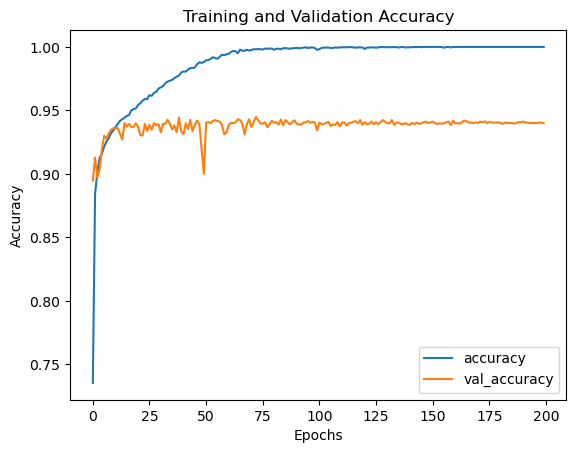

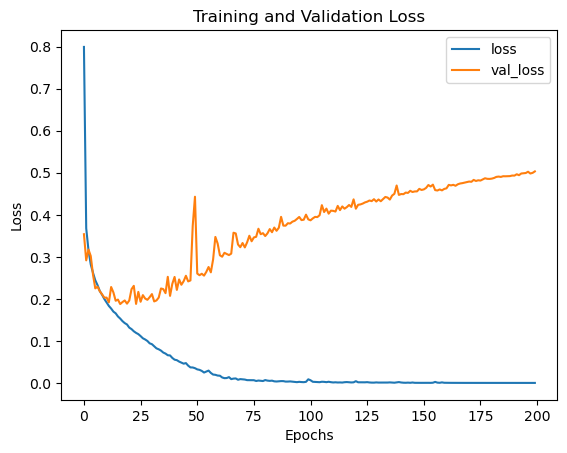

In [18]:
plt.plot(log.history['accuracy'], label='accuracy')
plt.plot(log.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
predictions = model.predict(X_test)

157/157 [==============================] - 1s 8ms/step


In [20]:
X_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.16078431],
        [0.0745098 ],
        [0.        ],
        [0.        ],
        [0.        ],
        

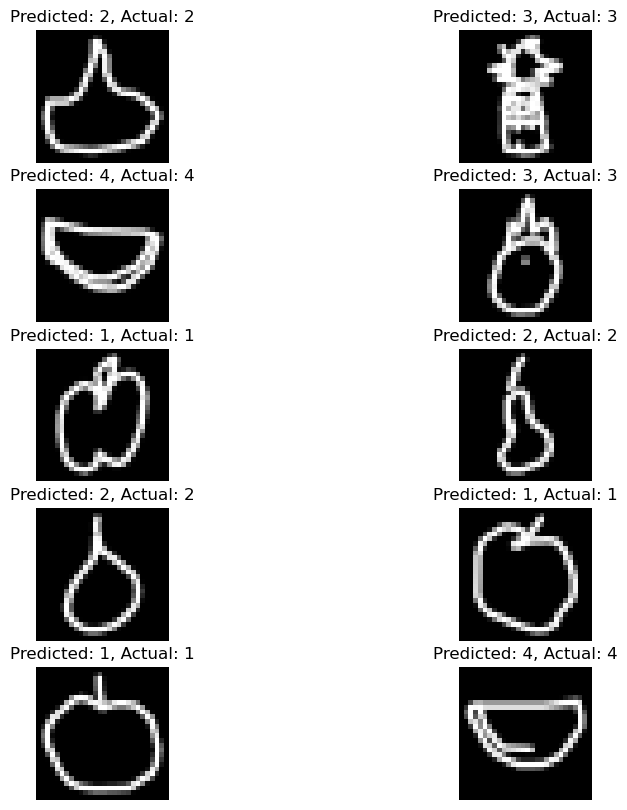

In [21]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(np.argmax(predictions[i]), y_test[i]))
    plt.axis('off')
plt.show()

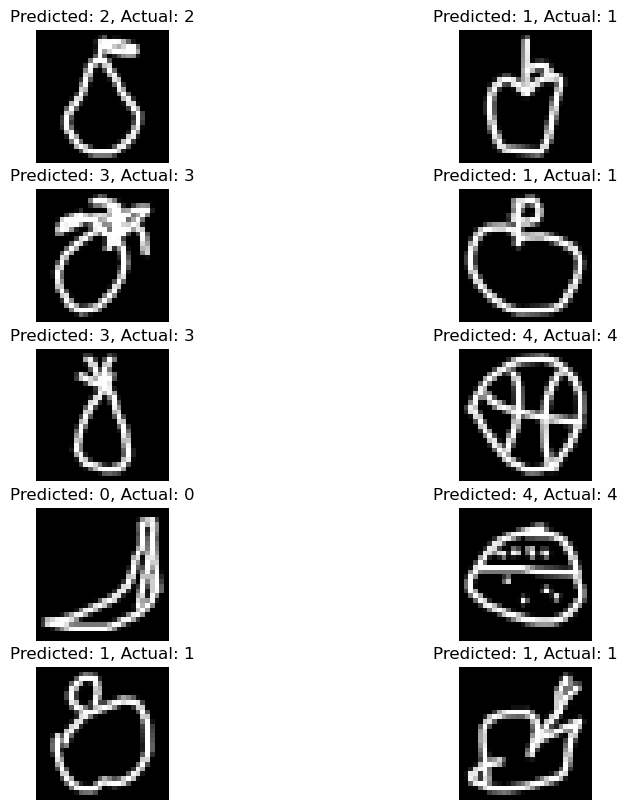

In [22]:
plt.figure(figsize=(10, 10))
for i in range(10,20):
    plt.subplot(5, 2, i - 9)
    plt.imshow(X_test[i], cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(np.argmax(predictions[i]), y_test[i]))
    plt.axis('off')
plt.show()

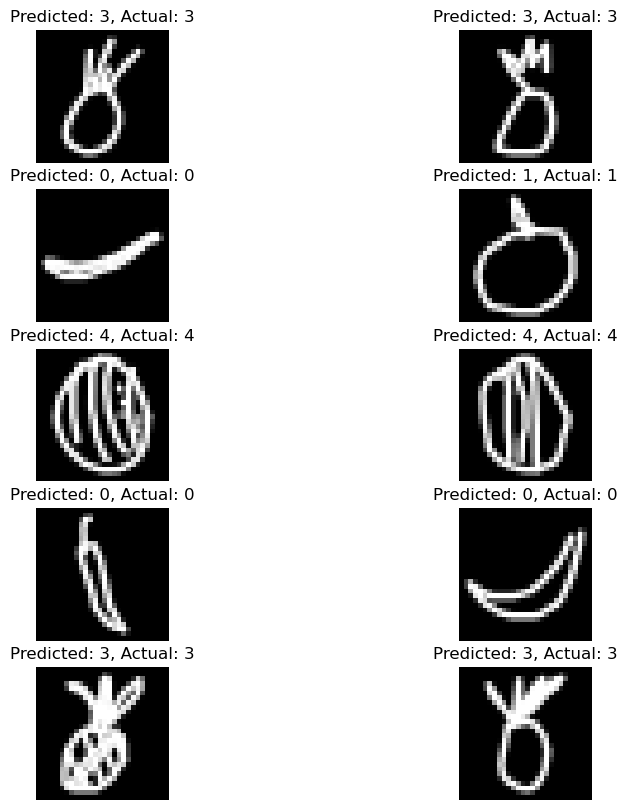

In [23]:
plt.figure(figsize=(10, 10))
for i in range(20,30):
    plt.subplot(5, 2, i - 19)
    plt.imshow(X_test[i], cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(np.argmax(predictions[i]), y_test[i]))
    plt.axis('off')
plt.show()

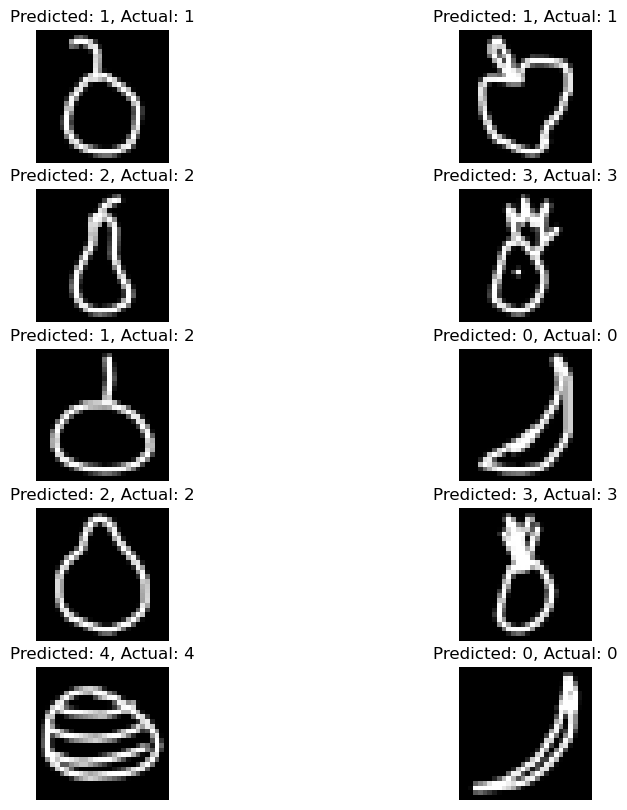

In [24]:
plt.figure(figsize=(10, 10))
for i in range(30,40):
    plt.subplot(5, 2, i - 29)
    plt.imshow(X_test[i], cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(np.argmax(predictions[i]), y_test[i]))
    plt.axis('off')
plt.show()

In [25]:
model.save('modelo_frutas_new.h5')

C:\Users\KATANA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
model_NEW = tf.keras.models.load_model("modelo_frutas_new.h5")

Imagen original:


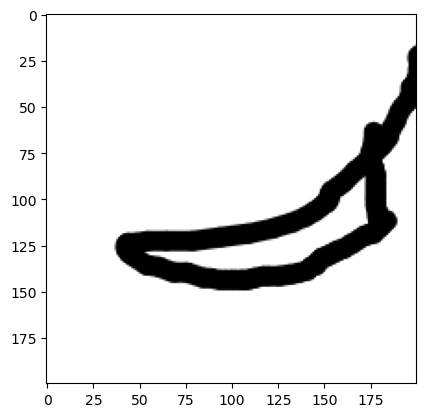

Imagen después del preprocesamiento:


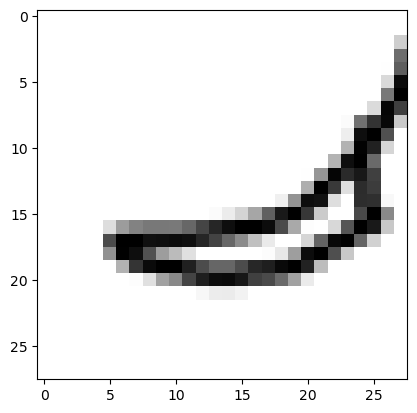

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0  49]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 146]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   1 161]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0  38 244]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0 135 255]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0  36 249 192]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [42]:
from PIL import Image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt  # Importa matplotlib para visualización

# Carga la imagen
#image = Image.open("apple/tmp0ne0w8ql.png")
image = Image.open("imagenes/banana_p.png") #puro negro

# Imprime la imagen original
print("Imagen original:")
plt.imshow(image, cmap='gray')
plt.show()

# Redimensiona y convierte la imagen a escala de grises
imagen_redimensionada = image.resize((28, 28))

# Imprime la imagen después del preprocesamiento
print("Imagen después del preprocesamiento:")
plt.imshow(imagen_redimensionada, cmap='gray')
plt.show()

# Convierte la imagen a un array numpy
image_array = np.array(imagen_redimensionada)

image_array = image_array[:,:,3] 

print(image_array)

# Normaliza los valores de píxeles (0 a 1)
image_array = image_array / 255.0

# Expande las dimensiones del array
image_array = np.expand_dims(image_array, axis=0)

# Realiza la predicción
prediction = model_NEW.predict(image_array)

# Decodifica la predicción para obtener la fruta correspondiente
frutas = ['banana', 'apple', 'pear', 'pineapple', 'watermelon']
resultado = frutas[np.argmax(prediction)]

# Imprime la predicción
print("Predicción:", resultado)
